##Text recognition with VietOCR
###Dữ liệu bao gồm:
  * Training: 16218 dòng text được cắt ra từ các bìa sách và đã được nhóm gán nhãn + 100000 dòng text lấy trên github VietOCR đã được gán nhãn sẵn
  * Valid: 4023 dòng text được cắt ra từ các bìa sách và đã được nhóm gán nhãn.

###Model sử dụng: TransformerOCR
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>


In [ ]:
# Cài đặt thư viện
! pip install --quiet vietocr==0.3.5

     |████████████████████████████████| 61 kB 3.4 MB/s 
     |████████████████████████████████| 280 kB 10.9 MB/s 
     |████████████████████████████████| 948 kB 60.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


# Import các thư viện

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Download bộ data

In [ ]:
! gdown https://drive.google.com/u/3/uc?id=1aZtbc95rdW1Yg--Hb6Hsrh0_YZHVEtHr&export=download

Downloading...
From: https://drive.google.com/u/3/uc?id=1aZtbc95rdW1Yg--Hb6Hsrh0_YZHVEtHr
To: /content/OCR.zip
100% 1.74G/1.74G [00:15<00:00, 110MB/s]


In [ ]:
! unzip -qq -o ./OCR.zip

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number

# Load config vgg_transformmer

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

dataset_params = {
    'name':'hw',
    'data_root':'./OCR/',
    'train_annotation':'train.txt',
    'valid_annotation':'val.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':10000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': './OCR/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train.txt',
  'valid_annotation': 'val.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/transformerocr.pth',
  'iters': 10000,
  'log': './train.log',
  'metrics': 10000,
  'print_ever

# Training

In [ ]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpfl912c7i/dl
100%|██████████| 152M/152M [00:00<00:00, 223MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|████████████████████████████████████| 115372/115372 [01:22<00:00, 1391.82it/s]

Created dataset with 115371 samples



train_hw build cluster: 100%|███████████████████████████| 115371/115371 [00:01<00:00, 103223.77it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Create valid_hw: 100%|████████████████████████████████████████| 4491/4491 [00:03<00:00, 1249.60it/s]


Created dataset with 4490 samples


valid_hw build cluster: 100%|███████████████████████████████| 4490/4490 [00:00<00:00, 103310.81it/s]


Visualize dataset để đối chiếu kết quả

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


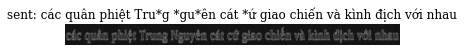

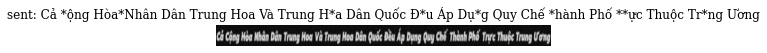

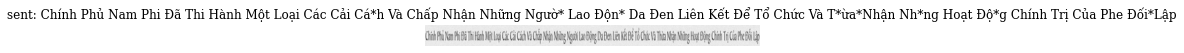

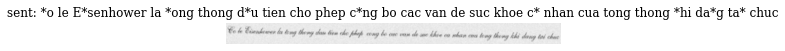

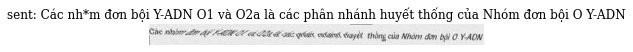

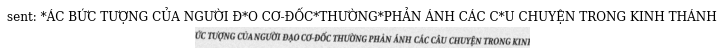

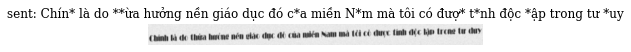

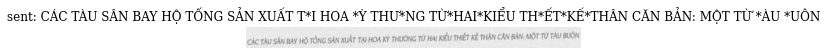

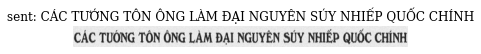

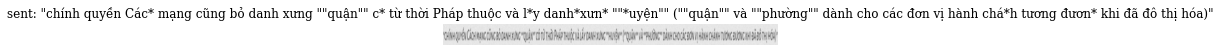

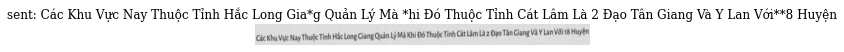

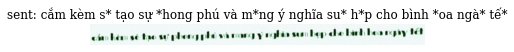

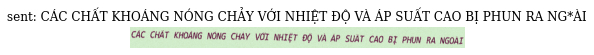

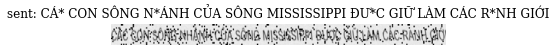

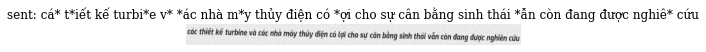

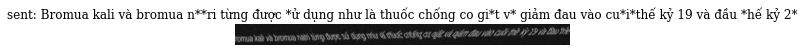

In [ ]:
trainer.visualize_dataset()

Bắt đầu training

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


iter: 000200 - train loss: 0.645 - lr: 3.96e-05 - load time: 0.71 - gpu time: 208.96
iter: 000400 - train loss: 0.615 - lr: 1.12e-04 - load time: 0.16 - gpu time: 220.93
iter: 000600 - train loss: 0.591 - lr: 2.01e-04 - load time: 0.12 - gpu time: 229.69
iter: 000800 - train loss: 0.595 - lr: 2.73e-04 - load time: 0.15 - gpu time: 230.75
iter: 001000 - train loss: 0.585 - lr: 3.00e-04 - load time: 0.12 - gpu time: 237.89
iter: 001200 - train loss: 0.589 - lr: 3.00e-04 - load time: 0.11 - gpu time: 235.58
iter: 001400 - train loss: 0.581 - lr: 2.99e-04 - load time: 0.21 - gpu time: 225.06
iter: 001600 - train loss: 0.581 - lr: 2.97e-04 - load time: 0.15 - gpu time: 228.40
iter: 001800 - train loss: 0.585 - lr: 2.94e-04 - load time: 0.11 - gpu time: 228.77
iter: 002000 - train loss: 0.579 - lr: 2.91e-04 - load time: 0.16 - gpu time: 222.77
iter: 002200 - train loss: 0.584 - lr: 2.87e-04 - load time: 0.15 - gpu time: 226.48
iter: 002400 - train loss: 0.583 - lr: 2.82e-04 - load time: 0.16

Visualize prediction

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


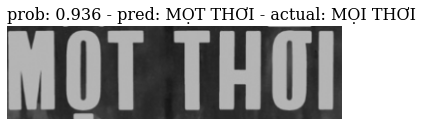

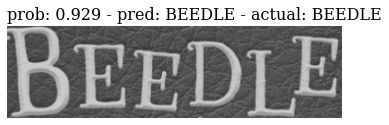

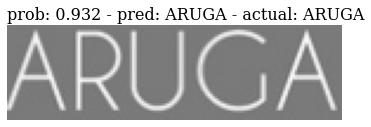

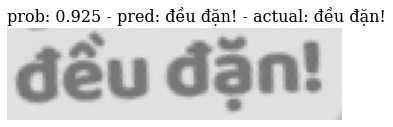

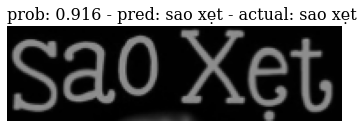

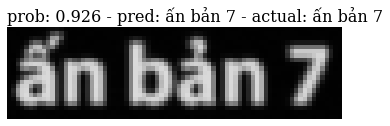

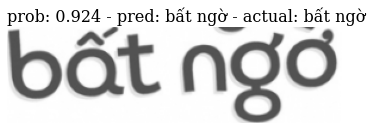

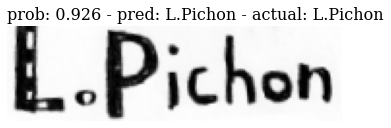

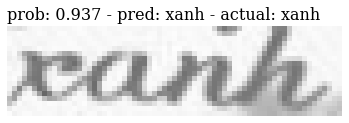

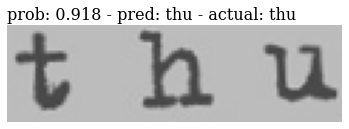

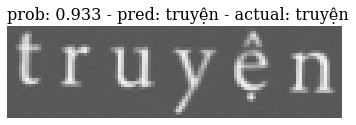

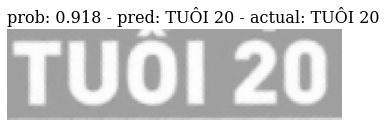

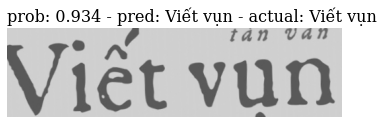

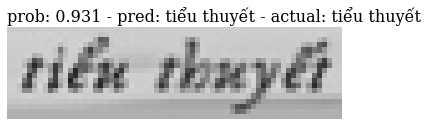

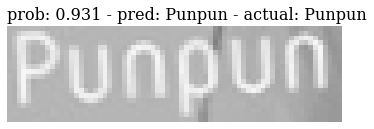

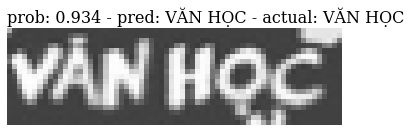

In [ ]:
trainer.visualize_prediction()

Accuracy

In [ ]:
trainer.precision()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(0.873114224137931, 0.96482104)

# Test thử một vài tấm

In [ ]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpn6_tx2hg/dl
100%|██████████| 152M/152M [00:02<00:00, 69.7MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/content/gdrive/MyDrive


'EM THÚ BÔNG'

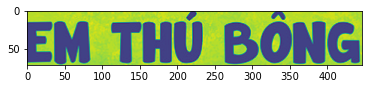

In [ ]:
from google.colab.patches import cv2_imshow
%cd /content/gdrive/MyDrive
img = '1.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s